# STAT 201 Group Proposal Group 27
___________________________________________

### Introduction

Our project is to research on the unemployment rate between if American Black Men and Women who possess and White Men and Women who alsoposess  The data was obtained from Kaggle at https://www.kaggle.com/datasets/asaniczka/unemployment-rates-by-demographics-1978-2023?rvi=1. The data contains the unemployment rate from 1978-2023.

### Method

We will consider use the dataset to compare the spread of age of unemployment for different ethnicity, gender and the education level... **(TBC)** The code below loads the libraries that are required for the proposal in order for various tasks to run and parsing of the codes to read the CSV file that is uploaded to GitHub.

In [2]:
# Libraries required for the proposal
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse) 
library(tidymodels)
library(datasets)
library(rvest)
library(tibble) 
library(httr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ recipes      1.0.8     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr:

In [3]:
# Reading of CSV file from GitHub
test_read <- read_csv("https://raw.githubusercontent.com/anjx123/stats201-group-project/main/unemployed_population_1978-12_to_2023-07_original.csv")
head(test_read) # First 6 data
tail(test_read) # Last 6 data

Rows: 536 Columns: 122
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl  (121): all, 16-24, 25-54, 55-64, 65+, less_than_hs, high_school, some_c...
date   (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


date,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelor's_degree,⋯,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelor's_degree,white_men_advanced_degree,population_over_16
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023-07-01,3.6,7.8,3.1,2.4,2.7,7.0,4.8,3.4,2.4,⋯,7.0,2.5,2.1,2.4,7.0,3.8,2.8,2.1,1.6,267002000
2023-06-01,3.6,7.8,3.1,2.4,2.8,7.1,4.8,3.4,2.4,⋯,7.0,2.5,2.1,2.5,7.0,3.8,2.9,2.1,1.6,266801000
2023-05-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,⋯,7.0,2.5,2.1,2.5,6.9,3.8,2.9,2.1,1.6,266618000
2023-04-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,⋯,7.0,2.5,2.2,2.5,6.9,3.8,2.9,2.1,1.6,266443000
2023-03-01,3.6,8.0,3.0,2.5,2.8,7.1,4.8,3.5,2.4,⋯,7.1,2.5,2.2,2.5,6.8,3.9,2.9,2.1,1.7,266272000
2023-02-01,3.6,8.1,3.0,2.4,2.9,7.2,4.8,3.5,2.4,⋯,7.2,2.5,2.2,2.6,6.8,3.9,2.9,2.1,1.7,266112000


date,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelor's_degree,⋯,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelor's_degree,white_men_advanced_degree,population_over_16
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1979-05-01,5.9,11.9,4.2,2.8,3.7,9.9,5.3,4.9,2.9,⋯,9.4,2.8,2.3,3.4,7.6,3.8,3.6,2.0,1.3,164459000
1979-04-01,5.9,11.9,4.2,2.8,3.7,9.9,5.4,4.9,3.0,⋯,9.4,2.8,2.3,3.5,7.5,3.8,3.6,2.0,1.3,164162000
1979-03-01,6.0,12.0,4.3,2.8,3.8,9.9,5.4,4.9,3.0,⋯,9.4,2.8,2.4,3.5,7.5,3.8,3.6,2.1,1.3,164027000
1979-02-01,6.0,12.2,4.3,2.8,3.8,9.9,5.4,5.0,3.0,⋯,9.6,2.8,2.4,3.5,7.6,3.9,3.6,2.1,1.4,163726000
1979-01-01,6.1,12.3,4.3,2.9,3.7,10.0,5.5,5.0,3.1,⋯,9.7,2.9,2.5,3.5,7.6,3.9,3.7,2.1,1.4,163516000
1978-12-01,6.1,12.4,4.3,2.9,3.8,10.0,5.5,5.0,3.1,⋯,9.7,2.9,2.5,3.6,7.6,4.0,3.7,2.1,1.4,163272000


                                               Figure 1

Figure 1 shows the first and last 6 data that is obtained from ```read_csv```. Given that we are interested in only finding the... **TBC**

### Data Wrangling

The code as shown below filters the columns and data that is required to answer our inference on whether does black women who possess a bacherlor's degree have a higher unemployment rates as compared to white women who also possess a bachelor's degree. 

In [9]:
req_data <- test_read |>
    select(date,`black_bachelor's_degree`, `white_bachelor's_degree`) 
    

head(req_data)

date,black_bachelor's_degree,white_bachelor's_degree
<date>,<dbl>,<dbl>
2023-07-01,3.4,2.1
2023-06-01,3.4,2.1
2023-05-01,3.4,2.1
2023-04-01,3.5,2.1
2023-03-01,3.6,2.1
2023-02-01,3.6,2.1


In [16]:
bach_median <- req_data |> 
        summarise(black_bach_median = median(`black_bachelor's_degree`),
                 white_bach_median = median(`white_bachelor's_degree`)) 

bach_median

black_bach_median,white_bach_median
<dbl>,<dbl>
4.5,2.7


Which is the sample statistic

We decide to use a seed of 5638.

In [20]:
## By bootstrapping, where replace = TRUE
set.seed(5638)   ## To ensure consistent result

black_bachelor <- req_data |>
    rep_sample_n(reps = 1000, size = 40, replace = TRUE) |>
    group_by(replicate) |>
    summarise(bootstrap_median = median(`black_bachelor's_degree`))

head(black_bachelor)
tail(black_bachelor)

replicate,bootstrap_median
<int>,<dbl>
1,4.5
2,4.8
3,4.9
4,4.8
5,4.3
6,4.7


replicate,bootstrap_median
<int>,<dbl>
995,5.15
996,4.35
997,4.80
998,4.30
999,4.50
1000,4.50


A 95% confidence interval would be ideal for the test. The code below shows the lower quantile and higher quantile.

In [23]:
# lower_quantile <- black_women_bachelor |>
#     pull(bootstrap_median) |>
#     quantile(0.025)

# lower_quantile

# upper_quantile <- black_women_bachelor |>
#     pull(bootstrap_median) |>
#     quantile(0.975)

# upper_quantile


ci <- black_bachelor |>
    summarise(ci_lower = quantile(bootstrap_median, 0.025),     # 95% conf. interval
                ci_upper = quantile(bootstrap_median, 0.975)) 

head(ci)

ci_lower,ci_upper
<dbl>,<dbl>
4,5.2


### Preliminary Results

The code below shows the preliminary results that we have obtained for taking the upper and lower quantile, the code for the plot of confidence interval is as shown.

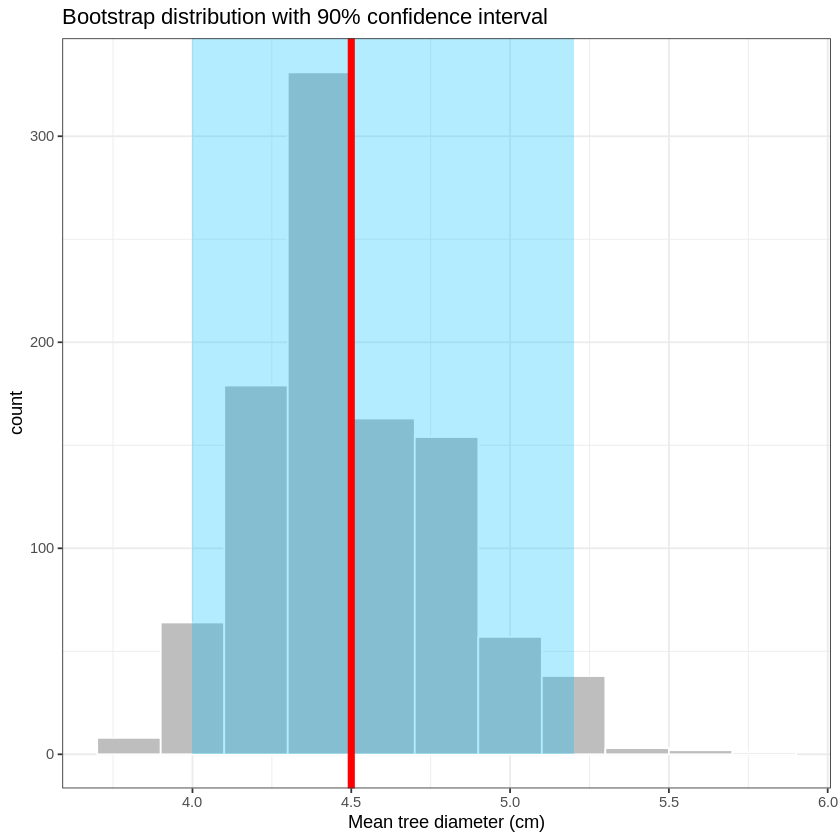

In [27]:
ci_plot <- 
    black_bachelor %>% 
    ggplot(aes(x = bootstrap_median)) +
    geom_histogram(binwidth = 0.2, colour = "white", fill = "grey") +
    annotate("rect", xmin = ci$ci_lower, xmax = ci$ci_upper, ymin = 0, ymax = Inf,
             fill = "deepskyblue",
             alpha = 0.3) +
    geom_vline(xintercept = bach_median$black_bach_median,
               size = 2,
               colour = "red") +
    labs(title = "Bootstrap distribution with 90% confidence interval",
         x = "Mean tree diameter (cm)") +
    theme_bw() # Sets a theme for better visibility

ci_plot

### Methods: Plan

This project uses a reliable data source compiled by the Economic Policy Institute's State of Working America Data Library and was combined with data from economic research conducted by the Federal Reserve Bank of St. Louis. These surveys that are conducted by respected and renowned groups which gives credibility to the sample so that it is less likely to be biased and more representative of the actual population that it was taken a part of. By focusing our data on the 21st century, we reduce the effects that time has on unemployement rates, focusing our project on employement equality in the present century. Choosing individuals with bachelors degrees puts them at a similar education level as well as experience in the workplace, seeking to minimize the effects of other random variables.


While plots and estimates provide a good visual representation and summary of the data, they may not be sufficient to make definitive conclusions about the difference in unemployment rates between white and black individuals with a bachelor’s degree. Here’s why:

1. Plots do not tell us whether the observed differences are statistically significant. Meaning they can be misleading and draw incorrect conclusions if the samples occured to appear so by chance and no statistical test of significance was used.

2. The plots do not provide a confidence interval to show us how precise our estimates are, meaning we are prone to mislead people who may take the center of the sample distribution to be the definite proportion.

To address these gaps, we will conduct a hypothesis test using the infer package. The framework will be roughly as such
dataset |> specify |> hypothesize with independence |> generate using permute |> calculate the diff in mean |> get_ci |> Graph the results

Bootstrapping to obtain the CI makes fewer assumptions on the data and can be simply obtained by using get_ci in the infer package
Asymptotic relies on the Central limit Theorem which relies on having a sufficiently sized data set that is not heavily skewed. In this case, It would be alright to use the asymptotic method as the dataset is large, and the difference in mean being a sum of values from the population. 



Due to the claims of systematic racism in America, we would expect to see that White individuals will have a lower unemployement rate over Black Individulas. 
This identification can help us understand the current state of inequality in the workplace in America and encourage social and economic policies to help alleviate any apparent disparity.
Perhaps this could lead to further questions regarding inequality in other parts of society such as Healthcare, Justice system, and Housing. Which may be interesting to investigate further to note any disparities that may be present.  